In [1]:
# add path (for local)
import sys
repo_root = "../"
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

In [2]:
%load_ext autoreload
%autoreload 2

from rdkit import RDLogger
from utils import generator_from_conf, conf_from_yaml
RDLogger.DisableLog('rdApp.*') # use debug: true to log invalid mols

def generate_and_analyze(generator, conf):
    generator.generate(time_limit=conf.get("time_limit"), max_generations=conf.get("max_generations"))
    generator.plot(**conf.get("plot_args", {}))
    generator.analyze()

def queue_generations(*args: str):
    for yaml_path in args:
        conf = conf_from_yaml(yaml_path, repo_root)
        generator = generator_from_conf(conf, repo_root)
        generate_and_analyze(generator, conf)

<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterHierarchyMatcher> already registered; second conversion method ignored.
/opt/anaconda3/envs/v3-forge/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


seed: 1751437511
Starting generation...
<best reward updated> order: 1, time: 0.00, reward: -0.6279, node: O=C(Nc1cnn(CC[NH+]2CCCCC2)c1)N[C@@H]1C[C@@H]1c1ccccc1
<best reward updated> order: 2, time: 0.19, reward: 0.8275, node: C[C@@H](Cc1ccsc1)N(C)C(=O)c1ccc(C(C)(C)C)o1
<best reward updated> order: 76, time: 0.98, reward: 0.9425, node: CC[C@H](C)[C@H](C[NH+](CC)C(C)C)[C@H](C)[NH3+]
generated: 100, time: 1.22, average over 100: 0.0119
generated: 200, time: 2.22, average over 100: 0.2286
<best reward updated> order: 278, time: 2.97, reward: 0.9512, node: CC(C)[C@@H](SC[C@H](C)CO)C(=O)N(C)C
<best reward updated> order: 288, time: 3.06, reward: 0.9531, node: CC(C)[C@@H](O)[C@H](C)SCC(C)(C)C
generated: 300, time: 3.16, average over 100: 0.1084
generated: 400, time: 4.16, average over 100: 0.2174
generated: 500, time: 5.06, average over 100: 0.3823
<best reward updated> order: 520, time: 5.23, reward: 0.9556, node: CC[C@H](N[C@@H](CC(F)(F)F)C(C)(C)C)C(C)C
generated: 600, time: 5.93, average 

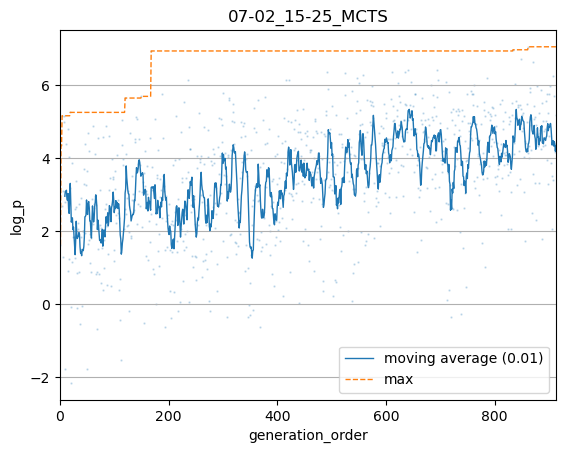

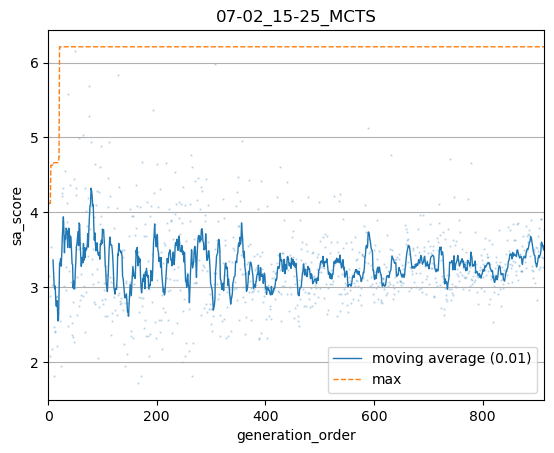

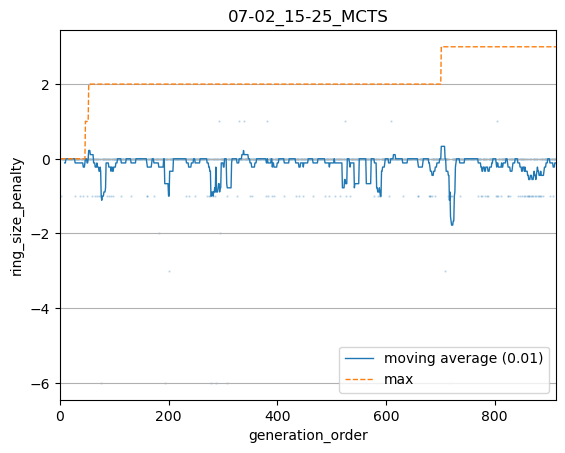

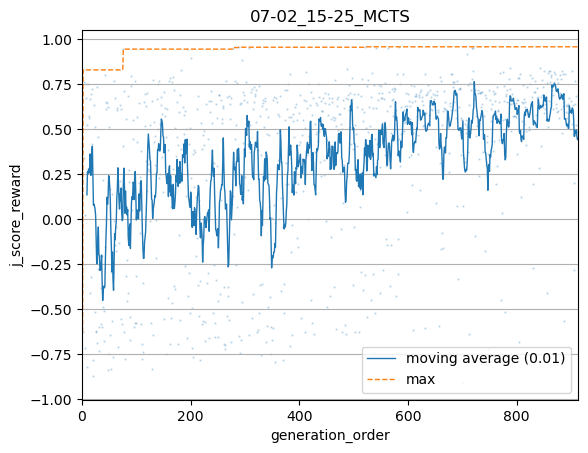

number of generated nodes: 913
valid rate: 0.9808306709265175
unique rate: 0.9914802981895634
node_per_sec: 105.32376726222616
best_reward: 0.955570197230681
average_reward: 0.3331744323472769


In [3]:
# start generation
c1 = "config/mcts_helm.yaml"
c2 = "config/mcts_smiles.yaml"
c3 = "config/model_test.yaml"
c4 = "config/mcts_d_score.yaml"
c5 = "config/mcts_biot5.yaml"

conf = conf_from_yaml(c2, repo_root)
generator = generator_from_conf(conf, repo_root)
generate_and_analyze(generator, conf)
# queue_generations(c1, c2)

In [ ]:
#continue search
generator.generate(time_limit=conf.get("time_limit") - generator.passed_time, max_generations=conf.get("max_generations") - len(generator.unique_keys))
generator.plot(**conf.get("plot_args", {}))
generator.analyze()

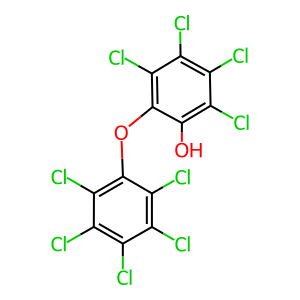

In [6]:
from node import MolStringNode
from language import SELFIES
from utils import draw_mol
x = MolStringNode.node_from_key("[O][C][=C][Branch1][C][Cl][C][Branch1][C][Cl][=C][Branch1][C][Cl][C][Branch1][C][Cl][=C][Ring1][#Branch2][O][C][=C][Branch1][C][Cl][C][Branch1][C][Cl][=C][Branch1][C][Cl][C][Branch1][C][Cl][=C][Ring1][#Branch2][Cl]", lang=SELFIES())
mol = x.mol()
draw_mol(mol)

In [16]:
#save mcts
save_path = generator.output_dir() + "save.mcts"
generator.save(save_path)

In [ ]:
#load generator and yaml
load_dir = "generation_result/06-26_08-51/"
generator, conf = read_yaml("sandbox/" + load_dir + "setting.yaml")
generator = Generator.load(load_dir + "save.mcts", generator.transition)

In [ ]:
#time test
import cProfile
import pstats

profiler = cProfile.Profile()
profiler.enable()
read_yaml(c2)
profiler.disable()

stats = pstats.Stats(profiler)
stats.sort_stats("cumtime").print_stats(100)